In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

clusters are [1 2 0]
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]
Silhouette Score: 0.4798814508199818


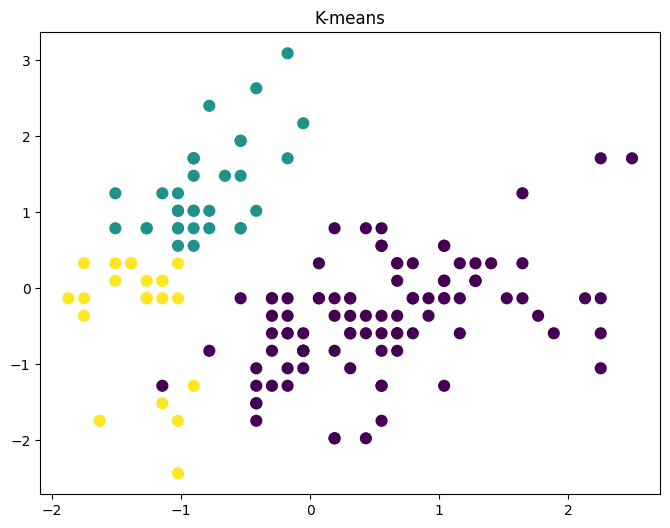

In [5]:
df=sns.load_dataset("iris")
X=df.drop("species",axis=1)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(X_scaled)


df["cluster"]=kmeans.labels_
print("clusters are",df["cluster"].unique())
print(kmeans.cluster_centers_)

sili_score=silhouette_score(X_scaled,kmeans.labels_)
print("Silhouette Score:",sili_score)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=df["cluster"],s=60)
plt.title("K-means")
plt.show()

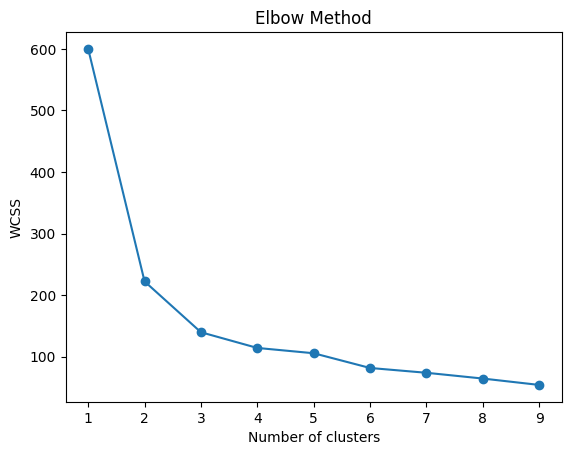

In [4]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
